XOR Problem with perceptrons

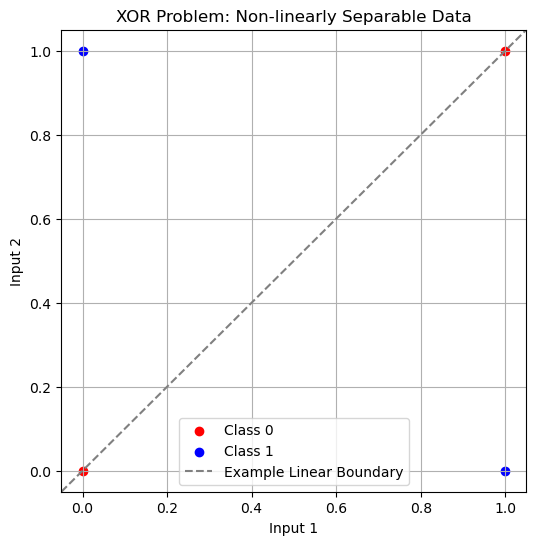

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

# Plot the XOR data
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.axline((0, 0), (1, 1), color='gray', linestyle='--', label='Example Linear Boundary')
plt.title("XOR Problem: Non-linearly Separable Data")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()


       MNPs with Back propagation-code

Loading the Fashion-MNIST Dataset
First, we need to load the Fashion-MNIST dataset from Keras, which provides easy access to common datasets for machine learning tasks. This dataset consists of 60,000 training images and 10,000 test images, where each image is 28x28 pixels in grayscale.

In [44]:
# Import the necessary library for loading the dataset
from tensorflow.keras import datasets

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()


This will give us:

X_train, the training data (images), and y_train, the labels for the training data.
X_test, the test data (images), and y_test, the labels for the test data.

Preprocessing the Data
Since the pixel values of the images are in the range [0, 255], we need to normalize these values to [0, 1] to improve the convergence of the neural network during training. This is done by dividing the pixel values by 255.0.

In [46]:
# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.min(), X_train.max())  # Should print 0.0 and 1.0
print(X_test.min(), X_test.max())    # Should print 0.0 and 1.0
print(set(y_train))  # Should print {0, 1, ..., 9}



0.0 0.00392156862745098
0.0 0.00392156862745098
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Visualizing the Dataset
Before training the model, it is a good idea to visualize a few samples from the dataset to better understand the data. We can plot 9 images from the training set.

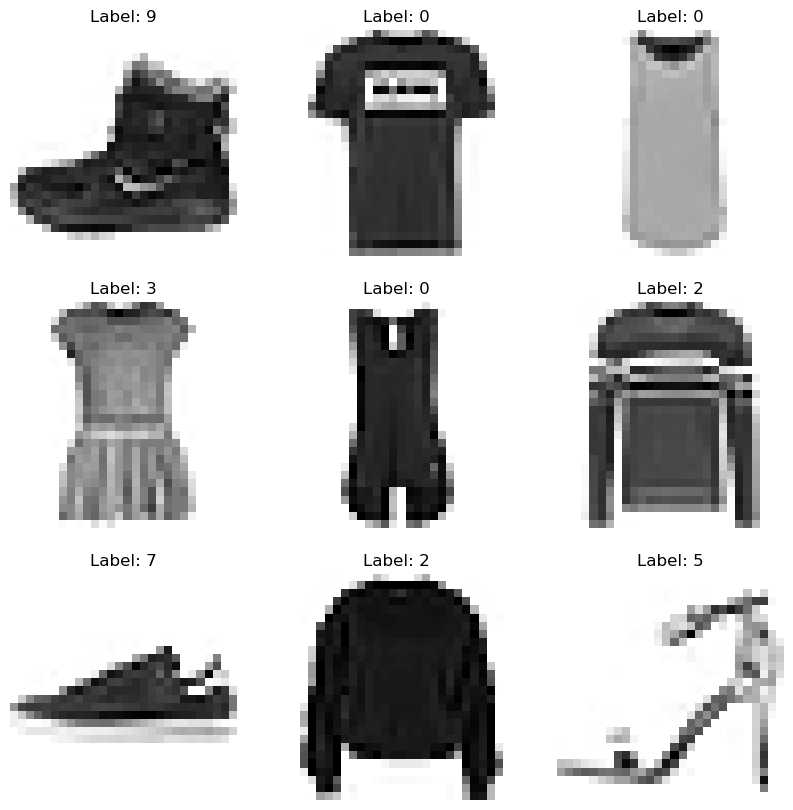

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the first 9 images of the training dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Step 3: Building the MLP Model
MLP Architecture
An MLP consists of:

Input Layer: Each input image is 28x28 pixels (784 features), which is flattened into a vector.
Hidden Layers: Typically, we use ReLU (Rectified Linear Unit) activation for hidden layers to introduce non-linearity.
Output Layer: The output layer will have 10 neurons (one for each class in Fashion-MNIST) with softmax activation to give probabilities for each class.
Here is the code for building the MLP model:

In [47]:
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

# Building the MLP model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Flatten the images into vectors
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.005)),  # Hidden layer with ReLU activation # L2 regularization
    layers.BatchNormalization(),  # Add batch normalization
    layers.Dropout(0.3),  # Dropout for regularization to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer for classification (Softmax)
])

# Display the model architecture
model.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,658 (920.54 KB)

 Trainable params: 235,402 (919.54 KB)

 Non-trainable params: 256 (1.00 KB)

Explanation of Layers:
Flatten Layer: Converts each 28x28 image into a 1D vector of 784 pixels.
Dense Layer: A fully connected layer where each neuron is connected to all neurons in the previous layer. The ReLU activation introduces non-linearity to handle complex relationships.
Dropout Layer: A regularization technique that helps prevent overfitting by randomly setting some neurons to zero during training, ensuring the model doesn’t overly rely on specific features.
Softmax Output Layer: Used for multi-class classification, where it converts the final output into a probability distribution over the 10 fashion categories.

Compile and Train the Model
Now that we have defined the architecture of the MLP model, the next step is to compile the model and then train it on the Fashion-MNIST dataset.

 Compile the Model
Before training, we need to compile the model by specifying the optimizer, loss function, and evaluation metrics.

Optimizer: We use Adam because it adapts the learning rate during training and generally performs well with complex models and datasets.
Loss Function: Since this is a multi-class classification problem, we use sparse categorical cross-entropy.
Metrics: We’ll track accuracy during training to assess the model’s performance.

Adam optimizer: This is an adaptive learning rate optimization algorithm, which combines the benefits of RMSprop and Momentum, providing faster convergence and stable performance (Kingma & Ba, 2015). Sparse Categorical Cross-entropy: This loss function is used when class labels are provided as integers (rather than one-hot encoded vectors), which is the case for the Fashion-MNIST labels. Accuracy: This metric helps track how well the model predicts the correct class during training and testing.

Learning Rate Schedules:
Gradually decreasing the learning rate during training which can help the model converge more efficiently and avoids overshooting the optimal solution. This decreases the learning rate by 4% every 100,000 steps


In [49]:
import tensorflow as tf

from tensorflow.keras.optimizers.schedules import ExponentialDecay


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the Model
Once the model is compiled, we can proceed with training. We will use the training data (X_train and y_train) and the test data (X_test and y_test) for validation during training. We'll train the model for 5 epochs.

In [50]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6576 - loss: 1.7855 - val_accuracy: 0.7823 - val_loss: 0.8099
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7951 - loss: 0.7690 - val_accuracy: 0.8110 - val_loss: 0.6424
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8158 - loss: 0.6294 - val_accuracy: 0.8185 - val_loss: 0.5824
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8302 - loss: 0.5683 - val_accuracy: 0.8281 - val_loss: 0.5463
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8349 - loss: 0.5346 - val_accuracy: 0.8334 - val_loss: 0.5173
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8386 - loss: 0.5094 - val_accuracy: 0.8338 - val_loss: 0.5055
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8483 - loss: 0.4880 - val_accuracy: 0.8412 - val_loss: 0.4859
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8493 - loss: 0

Here’s what’s happening:

epochs=5: The model will iterate through the entire training dataset 5 times.
validation_data=(X_test, y_test): This allows us to validate the model’s performance after each epoch on the test set, helping us monitor overfitting and underfitting.Also Early stopping monitors the validation loss and stops training when it starts to increase, preventing overfitting.This has stopped training if the validation loss does not improve for 3 consecutive epochs (patience=3)


In [38]:
pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------- ------------------------------ 30.7/129.1 kB 1.3 MB/s eta 0:00:01
   ------------ -------------------------- 41.0/129.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='fashion_mnist_tuning')

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from my_dir\fashion_mnist_tuning\tuner0.json


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


Evaluate the Model
After training the MLP model, it's important to assess its performance using the test dataset to understand how well it generalizes to unseen data. This step involves evaluating the model’s accuracy and loss on the test set and visualizing how the model performed during training.

 Evaluate the Model Performance
We can evaluate the trained model using the test data to calculate its accuracy and loss. The evaluation metrics will give us a sense of how well the model performs on data it has never seen before, which is important for ensuring that the model generalizes well and is not overfitting.

In [51]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy and loss
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3985
Test accuracy: 0.8663
Test loss: 0.4041


Here:

model.evaluate() computes the loss and accuracy based on the test data (X_test and y_test).
The test accuracy gives the proportion of correctly classified images out of the total test set.
The loss value indicates how far off the model’s predictions are from the actual labels (lower loss is better).

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.80      0.78      1000
           3       0.86      0.88      0.87      1000
           4       0.77      0.80      0.78      1000
           5       0.94      0.93      0.94      1000
           6       0.72      0.60      0.66      1000
           7       0.92      0.93      0.92      1000
           8       0.94      0.98      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



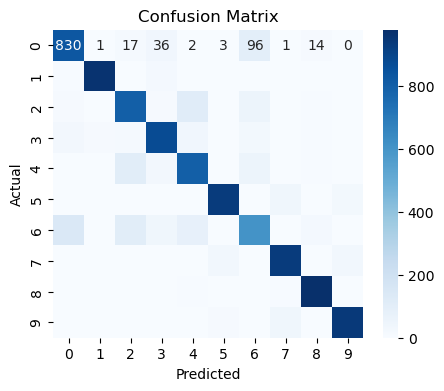

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Visualizing Model Performance: Training Accuracy and Loss To understand the model’s learning process better, we can visualize the training accuracy and training loss over the epochs using the history object returned from the model.fit() function.

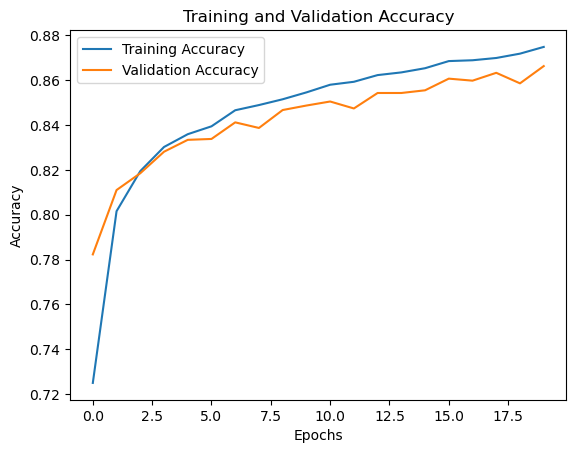

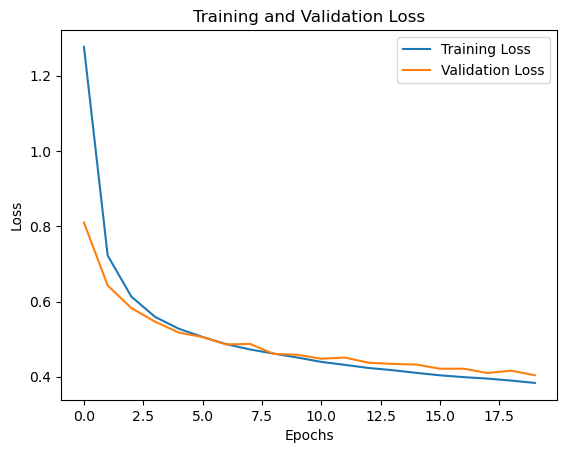

In [62]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




Accuracy Plot: This plot shows how the accuracy of the model improved during training for both the training and validation datasets. It helps visualize if the model is overfitting (i.e., if the training accuracy continues to increase while validation accuracy plateaus or decreases).

Loss Plot: Similarly, this plot shows how the loss decreased over time. If the training loss decreases but the validation loss increases, it could indicate overfitting.

Make Predictions
After evaluating the model, the next step is to use the trained MLP model to make predictions on new, unseen data. In this case, we'll use the test dataset to predict the class of each image and compare the model's predictions with the actual labels.

1. Making Predictions
We can use the model.predict() method to predict the class for the images in the test set.


In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the first 10 predictions and their actual labels
print("Predictions:", y_pred_labels[:10])
print("Actual labels:", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predictions: [9 2 1 1 6 1 4 6 5 7]
Actual labels: [9 2 1 1 6 1 4 6 5 7]


Explanation:

model.predict() gives the probabilities for each of the 10 classes for each image in the test set.
np.argmax() is used to convert these probabilities into the predicted class label (the class with the highest probability).
We print the first 10 predictions and compare them with the actual labels to see how well the model is performing.

Visualizing Predictions
To make the results more interpretable, we can visualize the predicted classes alongside the actual images from the test set.
This will display the first 10 test images, showing the predicted and actual class labels for each image.

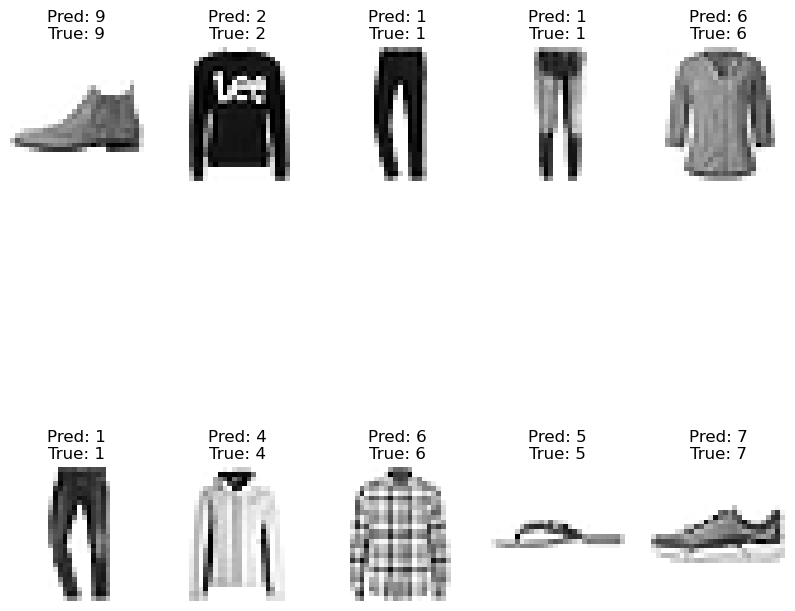

In [18]:
# Visualize the first 10 test images with predictions and actual labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()
